# Forecasting individual concentraions without S4 and S2

### 1) Importing libraries and functions

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *


# from Data_sorting import Data_formatter_cycles

In [37]:
data = pd.read_excel('C:/Users/ADITYA/OneDrive - Imperial College London/Year 4/FYP/Final-year-project/Data formatting/Dataset_scaled_denoised.xlsx')
data = data[data['I'] == 1.6]
X = data.iloc[1:-1,:9]
X = X.drop('I', axis = 1)
y = data.iloc[2:,11:]
y2 = data.iloc[2:,:9]

In [38]:
print(X)

          S8_cur    S4_cur    S2_cur    S1_cur     V_cur    Sp_cur        EH  \
1       2.914558 -2.960002 -0.929154 -0.232859  3.965686 -0.925127  3.914506   
2       2.914450 -2.959872 -0.929154 -0.232859  3.953539 -0.925127  3.902619   
3       2.914342 -2.959743 -0.929154 -0.232858  3.941755 -0.925127  3.891043   
4       2.914234 -2.959613 -0.929154 -0.232858  3.930271 -0.925127  3.879762   
5       2.914126 -2.959483 -0.929154 -0.232858  3.919073 -0.925127  3.868761   
...          ...       ...       ...       ...       ...       ...       ...   
144007 -0.715584 -0.685297  2.665348 -0.146793 -0.871372  2.664068 -0.874460   
144008 -0.715584 -0.685340  2.665422 -0.146794 -0.871377  2.664142 -0.874464   
144009 -0.715584 -0.685383  2.665497 -0.146795 -0.871381  2.664216 -0.874468   
144010 -0.715584 -0.685426  2.665571 -0.146795 -0.871385  2.664290 -0.874473   
144011 -0.715584 -0.685469  2.665645 -0.146796 -0.871390  2.664365 -0.874477   

              EL  
1       4.072668  
2

In [86]:
import numpy as np
import tensorflow as tf

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Set deterministic GPU usage
tf.config.experimental.set_visible_devices([], 'GPU')

# Voltage prediction

In [49]:
X_V = X.copy()
# X_S4 = X_S4.drop('iL', axis = 1)
# X_S4 = X_S4.drop('iH', axis = 1)
X_V = X_V.drop('S2_cur', axis = 1)
X_V = X_V.drop('S1_cur', axis = 1)
X_V = X_V.drop('Sp_cur', axis = 1)


y_V = y['V_cur.1']

X_numpy_V = X_V.values
y_numpy_V = y_V.values

# Split the data into train and test sets
X_train_V, X_test_V, y_train_V, y_test_V = train_test_split(X_numpy_V, y_numpy_V, test_size=0.2, random_state=42)

In [53]:
modelV = Sequential()
modelV.add(Dense(5, activation='sigmoid', input_dim = 5))
# model.add(Dense(6, activation='relu'))
# model.add(Dense(12,activation = 'relu'))
# model4.add(Dense(4,activation = 'relu'))
# modelV.add(Dense(128,activation = 'relu'))
modelV.add(Dense(10,activation = 'relu'))
modelV.add(Dense(5,activation = 'relu'))
modelV.add(Dense(5,activation = 'relu'))
# model.add(Dense(10, activation='relu'))
modelV.add(Dense(1, activation='linear'))  # Output layer with a multiple neurons

# Compile the model
modelV.compile(optimizer='adam', loss='mean_squared_error')

modelV.fit(X_train_V, y_train_V, epochs=20, batch_size=32)

Epoch 1/20
3601/3601 [==============================] - 5s 1ms/step - loss: 0.0249
Epoch 2/20
3601/3601 [==============================] - 4s 1ms/step - loss: 1.6820e-04
Epoch 3/20
3601/3601 [==============================] - 3s 942us/step - loss: 1.2401e-04
Epoch 4/20
3601/3601 [==============================] - 4s 993us/step - loss: 1.0039e-04
Epoch 5/20
3601/3601 [==============================] - 3s 884us/step - loss: 1.1333e-04
Epoch 6/20
3601/3601 [==============================] - 4s 1ms/step - loss: 1.0142e-04
Epoch 7/20
3601/3601 [==============================] - 4s 1ms/step - loss: 9.2897e-05
Epoch 8/20
3601/3601 [==============================] - 3s 924us/step - loss: 8.7013e-05
Epoch 9/20
3601/3601 [==============================] - 3s 902us/step - loss: 9.4791e-05
Epoch 10/20
3601/3601 [==============================] - 4s 1ms/step - loss: 9.0668e-05
Epoch 11/20
3601/3601 [==============================] - 4s 1ms/step - loss: 8.7508e-05
Epoch 12/20
3601/3601 [============

In [54]:
# Evaluate the model on the test set
mse = modelV.evaluate(X_test_V, y_test_V)
print(f"Mean Squared Error on Test Set: {mse}")

901/901 [==============================] - 1s 662us/step - loss: 3.9615e-06
Mean Squared Error on Test Set: 3.961483798775589e-06


# EH prediction

In [55]:
X_EH = X.copy()
# X_S4 = X_S4.drop('iL', axis = 1)
# X_S4 = X_S4.drop('iH', axis = 1)
X_EH = X_EH.drop('S2_cur', axis = 1)
X_EH = X_EH.drop('S1_cur', axis = 1)
X_EH = X_EH.drop('Sp_cur', axis = 1)


y_EH = y2['EH']

X_numpy_EH = X_EH.values
y_numpy_EH = y_EH.values

# Split the data into train and test sets
X_train_EH, X_test_EH, y_train_EH, y_test_EH = train_test_split(X_numpy_EH, y_numpy_EH, test_size=0.2, random_state=42)

In [56]:
modelEH = Sequential()
modelEH.add(Dense(5, activation='relu', input_dim = 5))
# model.add(Dense(6, activation='relu'))
# model.add(Dense(12,activation = 'relu'))
# model4.add(Dense(4,activation = 'relu'))
modelEH.add(Dense(3,activation = 'sigmoid'))
# model.add(Dense(10, activation='relu'))
modelEH.add(Dense(1, activation='linear'))  # Output layer with a multiple neurons

# Compile the model
modelEH.compile(optimizer='adam', loss='mean_squared_error')

modelEH.fit(X_train_EH, y_train_EH, epochs=20, batch_size=32)

Epoch 1/20
3601/3601 [==============================] - 3s 839us/step - loss: 0.0530
Epoch 2/20
3601/3601 [==============================] - 3s 863us/step - loss: 0.0027
Epoch 3/20
3601/3601 [==============================] - 3s 888us/step - loss: 4.9125e-04
Epoch 4/20
3601/3601 [==============================] - 3s 805us/step - loss: 2.3393e-04
Epoch 5/20
3601/3601 [==============================] - 3s 725us/step - loss: 1.5502e-04
Epoch 6/20
3601/3601 [==============================] - 3s 715us/step - loss: 1.2908e-04
Epoch 7/20
3601/3601 [==============================] - 3s 731us/step - loss: 1.1305e-04
Epoch 8/20
3601/3601 [==============================] - 3s 717us/step - loss: 1.0227e-04
Epoch 9/20
3601/3601 [==============================] - 3s 695us/step - loss: 9.4782e-05
Epoch 10/20
3601/3601 [==============================] - 3s 707us/step - loss: 8.8062e-05
Epoch 11/20
3601/3601 [==============================] - 3s 695us/step - loss: 8.3251e-05
Epoch 12/20
3601/3601 [====

In [66]:
# Evaluate the model on the test set
mse = modelEH.evaluate(X_test_EH, y_test_EH)
print(f"Mean Squared Error on Test Set: {mse}")

901/901 [==============================] - 1s 641us/step - loss: 2.2541e-05
Mean Squared Error on Test Set: 2.2540631107403897e-05


# EL prediction

In [59]:
X_EL = X.copy()
# X_S4 = X_S4.drop('iL', axis = 1)
# X_S4 = X_S4.drop('iH', axis = 1)
X_EL = X_EL.drop('S2_cur', axis = 1)
X_EL = X_EL.drop('S1_cur', axis = 1)
X_EL = X_EL.drop('Sp_cur', axis = 1)


y_EL = y2['EL']

X_numpy_EL = X_EL.values
y_numpy_EL = y_EL.values

# Split the data into train and test sets
X_train_EL, X_test_EL, y_train_EL, y_test_EL = train_test_split(X_numpy_EL, y_numpy_EL, test_size=0.2, random_state=42)

In [62]:
modelEL = Sequential()
modelEL.add(Dense(5, activation='relu', input_dim = 5))
# model.add(Dense(6, activation='relu'))
modelEL.add(Dense(10,activation = 'relu'))
# model4.add(Dense(4,activation = 'relu'))
# modelEL.add(Dense(32,activation = 'relu'))
# modelEL.add(Dense(8,activation = 'relu'))
# model.add(Dense(10, activation='relu'))
modelEL.add(Dense(1, activation='linear'))  # Output layer with a multiple neurons

# Compile the model
modelEL.compile(optimizer='adam', loss='mean_squared_error')

modelEL.fit(X_train_EL, y_train_EL, epochs=20, batch_size=32)

Epoch 1/20
3601/3601 [==============================] - 3s 769us/step - loss: 0.0393
Epoch 2/20
3601/3601 [==============================] - 3s 755us/step - loss: 1.4075e-04
Epoch 3/20
3601/3601 [==============================] - 3s 733us/step - loss: 6.3602e-05
Epoch 4/20
3601/3601 [==============================] - 3s 760us/step - loss: 5.6707e-05
Epoch 5/20
3601/3601 [==============================] - 3s 782us/step - loss: 5.7233e-05
Epoch 6/20
3601/3601 [==============================] - 3s 742us/step - loss: 5.4904e-05
Epoch 7/20
3601/3601 [==============================] - 3s 781us/step - loss: 5.4239e-05
Epoch 8/20
3601/3601 [==============================] - 3s 726us/step - loss: 5.3710e-05
Epoch 9/20
3601/3601 [==============================] - 3s 744us/step - loss: 5.4697e-05
Epoch 10/20
3601/3601 [==============================] - 3s 728us/step - loss: 5.4069e-05
Epoch 11/20
3601/3601 [==============================] - 3s 724us/step - loss: 5.2878e-05
Epoch 12/20
3601/3601 [

In [67]:
# Evaluate the model on the test set
mse = modelEL.evaluate(X_test_EL, y_test_EL)
print(f"Mean Squared Error on Test Set: {mse}")

901/901 [==============================] - 1s 676us/step - loss: 6.8094e-07
Mean Squared Error on Test Set: 6.809360684201238e-07


# S8 Prediction

In [87]:
X_S8 = X.copy()
X_S8 = X_S8.drop('S1_cur', axis = 1)
X_S8 = X_S8.drop('S2_cur', axis = 1)
X_S8 = X_S8.drop('Sp_cur', axis = 1)
# X_S8 = X_S8.drop('V_cur', axis = 1)
# X_S8 = X_S8.drop('iH', axis = 1)
   

y_S8 = y['S8_cur.1']

X_numpy_S8 = X_S8.values
y_numpy_S8 = y_S8.values

# Split the data into train and test sets
X_train_S8, X_test_S8, y_train_S8, y_test_S8 = train_test_split(X_numpy_S8, y_numpy_S8, test_size=0.2, random_state=42)

In [65]:
model8 = Sequential()
model8.add(Dense(10, activation='relu', input_dim = 5))
# model.add(Dense(6, activation='relu'))
# model.add(Dense(12,activation = 'relu'))
model8.add(Dense(5,activation = 'relu'))
# model.add(Dense(10, activation='relu'))
model8.add(Dense(1, activation='linear'))  # Output layer with a multiple neurons

# Compile the model
model8.compile(optimizer='adam', loss='mean_squared_error')

model8.fit(X_train_S8, y_train_S8, epochs=20, batch_size=32)

Epoch 1/20
3601/3601 [==============================] - 3s 794us/step - loss: 0.0232
Epoch 2/20
3601/3601 [==============================] - 3s 828us/step - loss: 1.4890e-04
Epoch 3/20
3601/3601 [==============================] - 3s 957us/step - loss: 7.1896e-05
Epoch 4/20
3601/3601 [==============================] - 3s 750us/step - loss: 6.3856e-05
Epoch 5/20
3601/3601 [==============================] - 3s 777us/step - loss: 6.9958e-05
Epoch 6/20
3601/3601 [==============================] - 4s 986us/step - loss: 6.7118e-05
Epoch 7/20
3601/3601 [==============================] - 3s 830us/step - loss: 6.5432e-05
Epoch 8/20
3601/3601 [==============================] - 3s 890us/step - loss: 6.4386e-05
Epoch 9/20
3601/3601 [==============================] - 4s 1ms/step - loss: 6.6976e-05
Epoch 10/20
3601/3601 [==============================] - 3s 793us/step - loss: 6.6486e-05
Epoch 11/20
3601/3601 [==============================] - 3s 770us/step - loss: 6.6768e-05
Epoch 12/20
3601/3601 [==

In [68]:
# Evaluate the model on the test set
mse = model8.evaluate(X_test_S8, y_test_S8)
print(f"Mean Squared Error on Test Set: {mse}")

901/901 [==============================] - 1s 616us/step - loss: 3.0493e-07
Mean Squared Error on Test Set: 3.0492844871332636e-07


# S2 prediction

In [114]:
X_S2 = X.copy()
X_S2 = X_S2.drop('EH', axis = 1)
X_S2 = X_S2.drop('S8_cur', axis = 1)
X_S2 = X_S2.drop('V_cur', axis = 1)
# X_S2 = X_S2.drop('Sp_cur', axis = 1)

y_S2 = y['S2_cur.1']

X_numpy_S2 = X_S2.values
y_numpy_S2 = y_S2.values

# Split the data into train and test sets
X_train_S2, X_test_S2, y_train_S2, y_test_S2 = train_test_split(X_numpy_S2, y_numpy_S2, test_size=0.2, random_state=42)

In [115]:
model2 = Sequential()
model2.add(Dense(5, activation='relu', input_dim = 5))
# model.add(Dense(6, activation='relu'))
# model.add(Dense(12,activation = 'relu'))
model2.add(Dense(3,activation = 'relu'))
# model.add(Dense(10, activation='relu'))
model2.add(Dense(1, activation='linear'))  # Output layer with a multiple neurons

# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')

model2.fit(X_train_S2, y_train_S2, epochs=20, batch_size=32)

Epoch 1/20
3601/3601 [==============================] - 4s 937us/step - loss: 0.1096
Epoch 2/20
3601/3601 [==============================] - 3s 855us/step - loss: 8.6897e-05
Epoch 3/20
3601/3601 [==============================] - 4s 1ms/step - loss: 4.7494e-05
Epoch 4/20
3601/3601 [==============================] - 3s 899us/step - loss: 3.8105e-05
Epoch 5/20
3601/3601 [==============================] - 3s 882us/step - loss: 3.6501e-05
Epoch 6/20
3601/3601 [==============================] - 4s 1ms/step - loss: 3.5991e-05
Epoch 7/20
3601/3601 [==============================] - 4s 1ms/step - loss: 3.7251e-05
Epoch 8/20
3601/3601 [==============================] - 3s 887us/step - loss: 3.5531e-05
Epoch 9/20
3601/3601 [==============================] - 3s 843us/step - loss: 3.5867e-05
Epoch 10/20
3601/3601 [==============================] - 3s 933us/step - loss: 3.5963e-05
Epoch 11/20
3601/3601 [==============================] - 4s 1ms/step - loss: 3.6069e-05
Epoch 12/20
3601/3601 [========

In [116]:
# Evaluate the model on the test set
mse = model2.evaluate(X_test_S2, y_test_S2)
print(f"Mean Squared Error on Test Set: {mse}")

901/901 [==============================] - 1s 634us/step - loss: 2.3650e-06
Mean Squared Error on Test Set: 2.3650213734072167e-06


# Sp prediction - maybe

In [91]:
X_Sp = X.copy()
X_Sp = X_Sp.drop('EH', axis = 1)
X_Sp = X_Sp.drop('EL', axis = 1)
X_Sp = X_Sp.drop('S8_cur', axis = 1)
X_Sp = X_Sp.drop('V_cur', axis = 1)

y_Sp = y['Sp_cur.1']

X_numpy_Sp = X_Sp.values
y_numpy_Sp = y_Sp.values

# Split the data into train and test sets
X_train_Sp, X_test_Sp, y_train_Sp, y_test_Sp = train_test_split(X_numpy_Sp, y_numpy_Sp, test_size=0.2, random_state=42)

In [92]:
modelp = Sequential()
modelp.add(Dense(8, activation='relu', input_dim = 4))
# model.add(Dense(6, activation='relu'))
# model.add(Dense(12,activation = 'relu'))
modelp.add(Dense(4,activation = 'relu'))
# model.add(Dense(10, activation='relu'))
modelp.add(Dense(1, activation='linear'))  # Output layer with a multiple neurons

# Compile the model
modelp.compile(optimizer='adam', loss='mean_squared_error')

modelp.fit(X_train_Sp, y_train_Sp, epochs=5, batch_size=32)

Epoch 1/5
3601/3601 [==============================] - 4s 878us/step - loss: 0.0193
Epoch 2/5
3601/3601 [==============================] - 3s 767us/step - loss: 6.0762e-05
Epoch 3/5
3601/3601 [==============================] - 3s 772us/step - loss: 4.2981e-05
Epoch 4/5
3601/3601 [==============================] - 3s 780us/step - loss: 3.4557e-05
Epoch 5/5
3601/3601 [==============================] - 3s 743us/step - loss: 3.4070e-05


In [93]:
# Evaluate the model on the test set
mse = modelp.evaluate(X_test_Sp, y_test_Sp)
print(f"Mean Squared Error on Test Set: {mse}")

901/901 [==============================] - 1s 619us/step - loss: 1.3053e-06
Mean Squared Error on Test Set: 1.3052616623099311e-06


# Important functions

In [121]:
def next_prediction(prediction, scales):

    array = []

    S8,S4,S2,S1,V,Sp,EH,EL = param_finder_Nernst(prediction,scale)

    array.append(S8)
    array.append(S4)
    array.append(S2)
    array.append(S1)
    array.append(V)
    array.append(Sp)
    array.append(EH)
    array.append(EL)

    array = np.array([array])

    return array 




def param_finder_Nernst(prediction, scales):
    # Defined in the code
    EH0 = 2.35
    EL0 = 2.195
    iH0 = 10
    iL0 = 5
    R = 8.3145
    T = 298
    F = 96490
    fh = 0.7296
    fl = 0.06654
    ar = 0.96

    power = (-2*F)/(R*T)

    # Values
    S8 = prediction[0][0]
    S2 = prediction[0][1]
    V = prediction[0][2]
    Sp = prediction[0][3]
    EH = prediction[0][4]
    EL = prediction[0][5]
    

    # Unscale the concentration values to find S8,S2,V,EH,EL to find S4 and S1
    S8_unscale = (prediction[0][0] * scales.iloc[1,0]) + scales.iloc[0,0]
    S2_unscale = (prediction[0][1] * scales.iloc[1,2]) + scales.iloc[0,2]
    V_unscale = (prediction[0][2] * scales.iloc[1,4]) + scales.iloc[0,4]
    Sp_unscale = (prediction[0][3] * scales.iloc[1,5]) + scales.iloc[0,5]
    EH_unscale = (prediction[0][4] * scales.iloc[1,6]) + scales.iloc[0,6]
    EL_unscale = (prediction[0][5] * scales.iloc[1,7]) + scales.iloc[0,7]

    # Calculating S4 and S1
    S4 = np.sqrt(fh*S8_unscale) * np.exp(power*(EH_unscale-EH0))
    S1 = np.sqrt((fl*S4)/S2_unscale) * np.exp(power*(EL_unscale-EL0))

    # Scaling values again for next input

    S4 = (S4 - scales.iloc[0,1])/scales.iloc[1,1]
    S1 = (S1 - scales.iloc[0,3])/scales.iloc[1,3]


    return S8,S4,S2,S1,V,Sp,EH,EL

In [118]:
X_numpy = X.values
y_numpy = y.values

In [122]:

def mass_prediction(input):
    S8_features = ['S8_cur', 'S4_cur', 'V_cur', 'EH', 'EL']
    S2_features = ['S4_cur','S2_cur', 'S1_cur', 'Sp_cur', 'EL']
    V_features = ['S8_cur', 'S4_cur', 'V_cur','EH', 'EL']
    EH_features = ['S8_cur', 'S4_cur', 'V_cur','EH', 'EL']
    EL_features = ['S8_cur', 'S4_cur', 'V_cur', 'EH', 'EL']
    Sp_features = ['S4_cur','S2_cur', 'S1_cur', 'Sp_cur']

    # Reshape the input to ensure it's 2D
    input_2d = input.reshape(1, -1)  # Reshape to 1 row, many columns

    input_df = pd.DataFrame(input_2d, columns = ['S8_cur', 'S4_cur','S2_cur', 'S1_cur', 'V_cur', 'Sp_cur','EH', 'EL'])

    S8_input = np.array(input_df[S8_features])
    S2_input = np.array(input_df[S2_features])
    V_input = np.array(input_df[V_features])
    EH_input = np.array(input_df[EH_features])
    EL_input = np.array(input_df[EL_features])
    Sp_input = np.array(input_df[Sp_features])

    S8 = model8.predict(S8_input)[0][0]
    S2 = model2.predict(S2_input)[0][0]
    V = modelV.predict(V_input)[0][0]
    EH = modelEH.predict(EH_input)[0][0]
    EL = modelEL.predict(EL_input)[0][0]
    Sp = modelp.predict(Sp_input)[0][0]

    array = [[S8,S2,V,Sp,EH,EL]]

    return array


# Multiple iterations

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


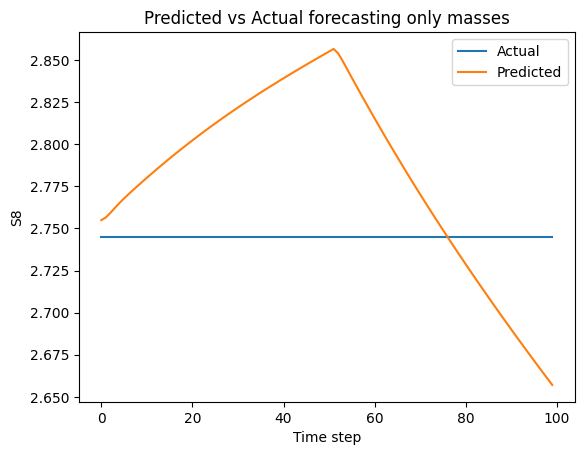

In [125]:
no_predictions = 100
start = 1500

input = np.array([X_numpy[start]])

# print(input)

# print(np.array([X_numpy[start + 1]]))

output = []

scale = pd.read_excel('C:/Users/ADITYA/OneDrive - Imperial College London/Year 4/FYP/Final-year-project/Data formatting/Scales_denoised.xlsx')

for i in range(no_predictions):
    
    next_prediction_array = mass_prediction(input)

    # print(next_prediction_array)

    input = next_prediction(next_prediction_array, scale)

    # print(input)

    output.append(input)

# print(output)

plot_actual = []

for j in range(no_predictions):
    plot_actual.append(X_numpy[no_predictions + start][0])

plt.plot(plot_actual, label = 'Actual')



mass = []
for i in range(len(output)):
    mass.append(output[i][0][0])

plt.plot(mass, label = 'Predicted')
plt.xlabel('Time step')
plt.ylabel('S8')
plt.title('Predicted vs Actual forecasting only masses')
plt.legend()

plt.show()

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 21ms/step
[[ 2.76066506 -2.76145598 -0.92884815 -0.23242865  2.28123569 -0.92314494
   2.24345052  2.31879473]]
1/1 [==============================] - 0s 18ms/step
[[ 2.76134914 -2.76106962 -0.92884815 -0.23242748  2.28088367 -0.92314625
   2.24264652  2.31796157]]
1/1 [==============================] - 0s 16ms/step
[[ 2.76169118 -2.76087644 -0.92884815 -0.23242689  2.28070766 -0.9231469
   2.24224451  2.317545  ]]
1/1 [==============================] - 0s 16ms/step
[[ 2.7618622  -2.76077986 -0.92884815 -0.2324266   2.28061965 -0.92314723
   2.24204351  2.31733671]]
1/1 [==============================] - 0s 19ms/step
[[ 2.76194771 -2.76073156 -0.92884815 -0.23242645  2.28057565 -0.9231474
   2.24194301  2.31723256]]
1/1 [==============================] - 0s 19ms/step
[[ 2.76199047 -2.76070741 -0.92884815 -0.23242638  2.28055365 -0.92314748
   2.24189276  2.31718049]]
1/1 [==============================] - 0s 17ms/step
[[ 2.76201185 -2.76069534 

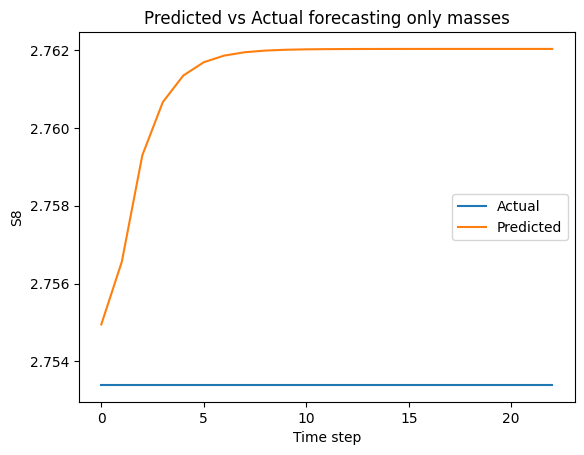

In [133]:
threshold = 0.001
errors = 0

# Define function for linear extrapolation
def linear_extrapolation(prev_array1, prev_array2):
    # Calculate the slope for each element
    slopes = prev_array2 - prev_array1
    # Extrapolate values for the third array
    extrapolated_array = prev_array2 + slopes/2
    return extrapolated_array


no_predictions = 100
start = 1500
input = np.array([X_numpy[start]])
output = []

scale = pd.read_excel('C:/Users/ADITYA/OneDrive - Imperial College London/Year 4/FYP/Final-year-project/Data formatting/Scales_denoised.xlsx')

# print(input)

for i in range(no_predictions):
    
    next_prediction_array = mass_prediction(input)

    # print(next_prediction_array)

    input = next_prediction(next_prediction_array, scale)


    if i > 2 and np.any(np.abs(np.array(input[0]) - np.array(output[i-1])) > threshold):
        linear_array = linear_extrapolation(np.array(output[i-2]), np.array(output[i-1]))
        errors += 1
        output.append(linear_array)
        print(linear_array)
        input = linear_array
        # print(input)


    else:
        output.append(input)


    if errors >= 20:
        no_predictions = i + 1
        break


plot_actual = []

for j in range(no_predictions):
    plot_actual.append(X_numpy[no_predictions + start][0])

plt.plot(plot_actual, label = 'Actual')



mass = []
for i in range(len(output)):
    mass.append(output[i][0][0])

plt.plot(mass, label = 'Predicted')
plt.xlabel('Time step')
plt.ylabel('S8')
plt.title('Predicted vs Actual forecasting only masses')
plt.legend()

plt.show()

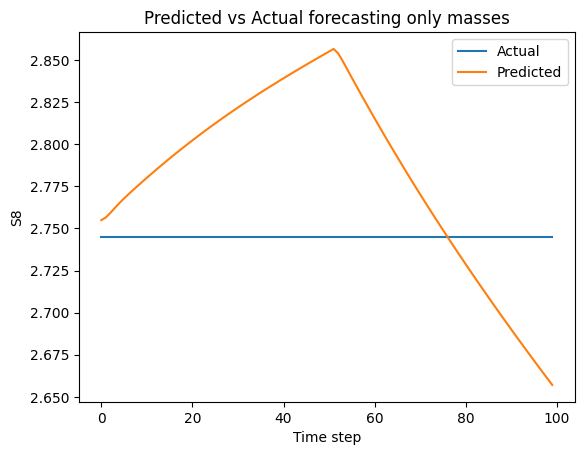

In [131]:
plot_actual = []

for j in range(no_predictions):
    plot_actual.append(X_numpy[no_predictions + start][0])

plt.plot(plot_actual, label = 'Actual')



mass = []
for i in range(len(output)):
    mass.append(output[i][0][0])

plt.plot(mass, label = 'Predicted')
plt.xlabel('Time step')
plt.ylabel('S8')
plt.title('Predicted vs Actual forecasting only masses')
plt.legend()

plt.show()